In [ ]:
%pip install opencv-python matplotlib pandas seaborn albumentations ultralytics


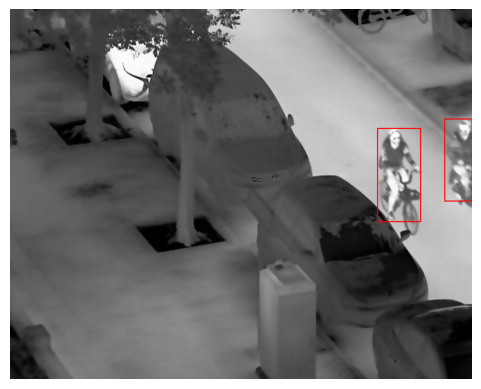

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def plot_image_with_yolo_bbox(img_path, label_path):
    if not os.path.exists(img_path):
        print("Image file not found:", img_path)
        return
    if not os.path.exists(label_path):
        print("Label file not found:", label_path)
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    plt.imshow(img)
    plt.axis("off")
    plt.show()

image_path = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/images/190001.jpg"
label_path = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels/190001.txt"

plot_image_with_yolo_bbox(image_path, label_path)


In [3]:
import yaml
import os

data_yaml_path = "dataset/data.yaml"

if os.path.exists(data_yaml_path):
    with open(data_yaml_path, "r") as file:
        data = yaml.safe_load(file)
        print("✅ YAML loaded successfully:")
        print(data)
else:
    print("❌ data.yaml not found in:", os.path.abspath(data_yaml_path))


✅ YAML loaded successfully:
{'path': '/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset', 'train': 'train/images', 'val': 'test/images', 'nc': 1, 'names': ['human']}


In [81]:
import os

image_dir = os.path.join("dataset", "train", "images")
label_dir = os.path.join("dataset", "train", "labels")

print("Image directory:", image_dir)
print("Label directory:", label_dir)

if not os.path.exists(image_dir):
    print(f"❌ Image folder not found: {image_dir}")
else:
    print(f"✅ Found image folder at: {image_dir}")

if not os.path.exists(label_dir):
    print(f"❌ Label folder not found: {label_dir}")
else:
    print(f"✅ Found label folder at: {label_dir}")


Image directory: dataset/train/images
Label directory: dataset/train/labels
✅ Found image folder at: dataset/train/images
✅ Found label folder at: dataset/train/labels


In [82]:
import os

label_dir = os.path.join( "dataset", "train", "labels")

if os.path.exists(label_dir):
    print(f"✅ Path exists: {label_dir}")
else:
    print(f"❌ Path does not exist: {label_dir}")


✅ Path exists: dataset/train/labels


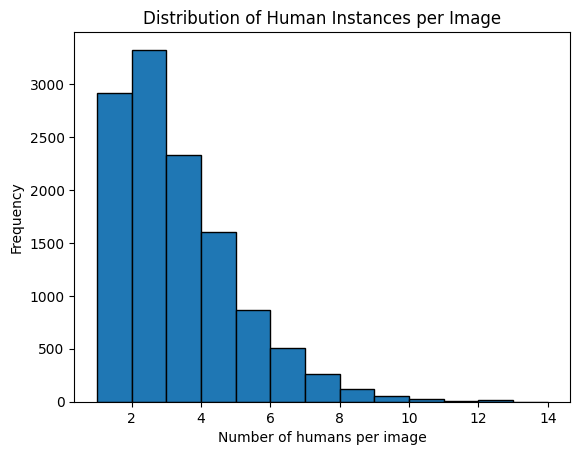

In [83]:
import os
import matplotlib.pyplot as plt

label_dir = os.path.join("dataset", "train", "labels")

label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

counts = []

for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        counts.append(len(lines))

# Plot the histogram
plt.hist(counts, bins=range(1, max(counts) + 2), edgecolor='black')
plt.xlabel("Number of humans per image")
plt.ylabel("Frequency")
plt.title("Distribution of Human Instances per Image")
plt.show()


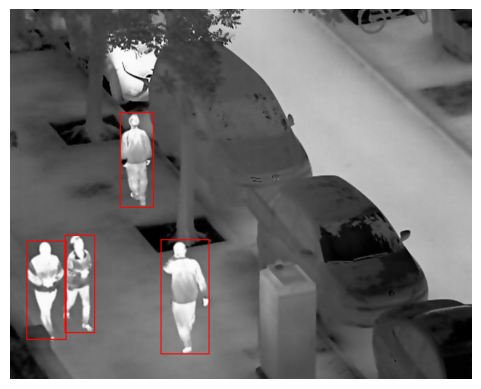

In [84]:
import cv2
import matplotlib.pyplot as plt
import os

def plot_image_with_yolo_bbox(img_path, label_path):
    # Check if files exist
    if not os.path.exists(img_path):
        print("Image file not found:", img_path)
        return
    if not os.path.exists(label_path):
        print("Label file not found:", label_path)
        return

    # Load and convert image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Draw bounding boxes from YOLO format
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# ✅ Example call — use correct macOS paths
plot_image_with_yolo_bbox(
    "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/images/190060.jpg",
    "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels/190060.txt"
)


In [85]:
train_images_path = 'dataset/train/images'
train_labels_path = 'dataset/train/labels'
test_images_path = 'dataset/test/images'
test_labels_path = 'dataset/test/labels'


In [86]:
import os

img_path = r"Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg"
print("Full Image Path:", os.path.abspath(img_path))


Full Image Path: /Users/cavins/Desktop/project/Thermal-image-human-detection/Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg


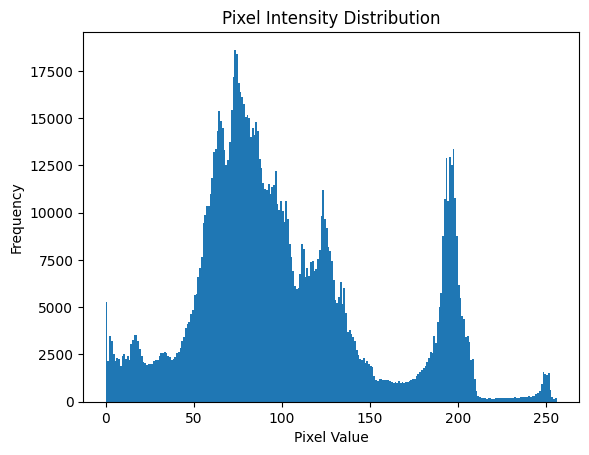

In [87]:
import cv2
import os
import matplotlib.pyplot as plt

# Corrected file path (with the correct structure)
image_filename = "190001.jpg"  # Example image file, ensure this is the correct name
img_path = os.path.join("dataset", "test", "images", image_filename)

# Read image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if img is not None:
    # Plot histogram of pixel intensities
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"Image {image_filename} not found or failed to load at: {img_path}")


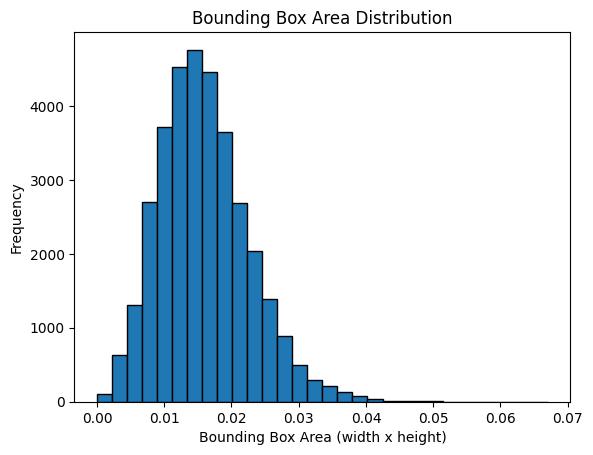

In [88]:
areas = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            area = width * height
            areas.append(area)

plt.hist(areas, bins=30, edgecolor='black')
plt.title("Bounding Box Area Distribution")
plt.xlabel("Bounding Box Area (width x height)")
plt.ylabel("Frequency")
plt.show()



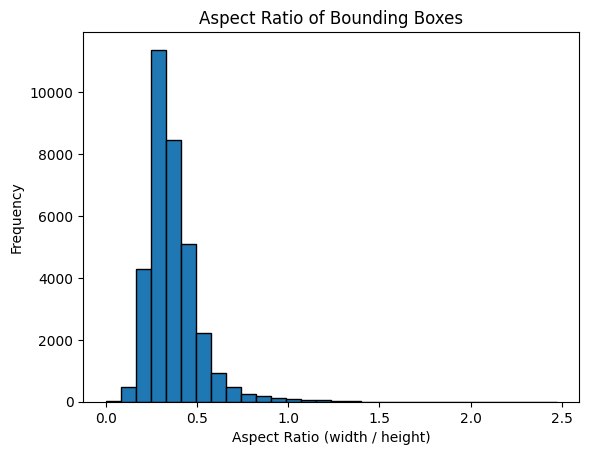

In [89]:
aspect_ratios = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

plt.hist(aspect_ratios, bins=30, edgecolor='black')
plt.title("Aspect Ratio of Bounding Boxes")
plt.xlabel("Aspect Ratio (width / height)")
plt.ylabel("Frequency")
plt.show()


In [22]:
img_dir = os.path.join( "dataset", "dataset", "train", "images")

# Get all label files (those ending with .txt)
img_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])

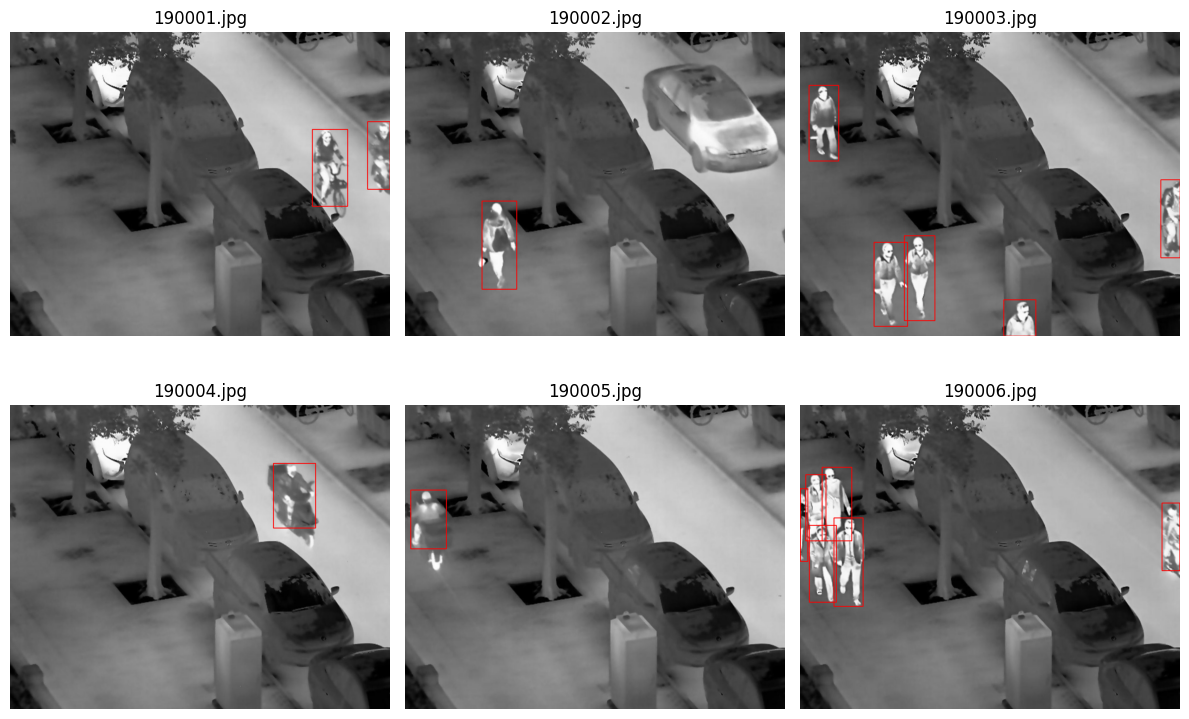

In [90]:
import os
import cv2
import matplotlib.pyplot as plt

img_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/images"
label_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels"

img_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
img_files.sort()  # Optional: to keep consistent order

sample_images = img_files[:6]

plt.figure(figsize=(12, 8))

for i, img_file in enumerate(sample_images):
    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))

    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f.readlines():
                _, x_center, y_center, width, height = map(float, line.strip().split())
                xmin = int((x_center - width / 2) * w)
                ymin = int((y_center - height / 2) * h)
                xmax = int((x_center + width / 2) * w)
                ymax = int((y_center + height / 2) * h)
                cv2.rectangle(img_rgb, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [91]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np


BASE_PATH = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test"
IMG_DIR = os.path.join(BASE_PATH, "images")
LABEL_DIR = os.path.join(BASE_PATH, "labels")
print("Total Images:", len(os.listdir(IMG_DIR)))
print("Total Labels:", len(os.listdir(LABEL_DIR)))


def load_image_and_labels(img_path, label_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found: {img_path}")
    h, w = img.shape

    boxes = []
    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f:
                cls, x, y, bw, bh = map(float, line.strip().split())
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                boxes.append((x1, y1, x2, y2))
    return img, boxes


Total Images: 3463
Total Labels: 3463


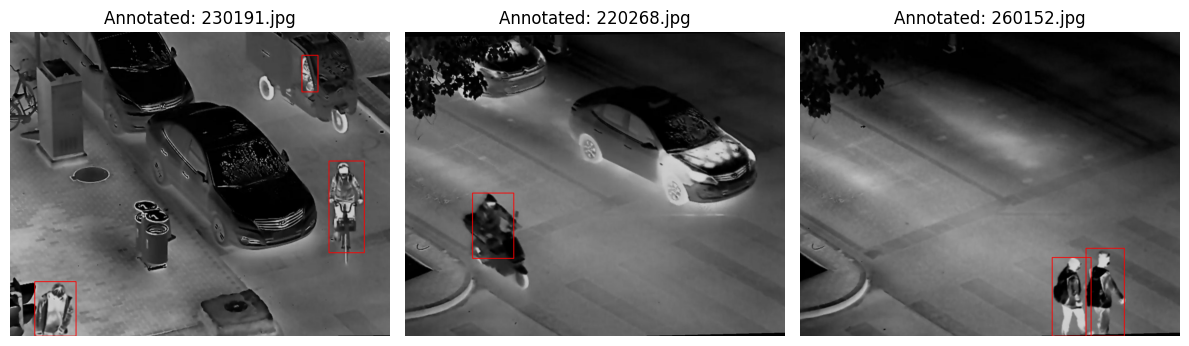

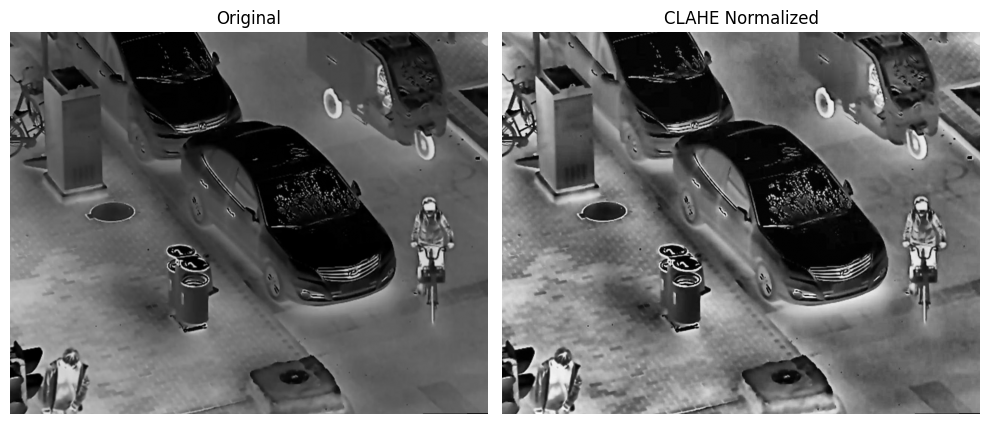

In [92]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Paths
img_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/images"
label_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels"

# List all jpg images
img_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
img_files.sort()

# Separate annotated vs unannotated images
annotated = [f for f in img_files if os.path.exists(os.path.join(label_dir, f.replace(".jpg", ".txt")))]
unannotated = list(set(img_files) - set(annotated))

# Pick 3 random samples each (or less if not enough)
annotated_samples = random.sample(annotated, min(3, len(annotated)))
unannotated_samples = random.sample(unannotated, min(3, len(unannotated)))

def draw_bboxes(img_rgb, label_path, w, h):
    """Draw bounding boxes on RGB image from YOLO label file."""
    with open(label_path) as f:
        for line in f:
            if not line.strip():
                continue
            parts = list(map(float, line.strip().split()))
            if len(parts) == 5:
                _, x, y, bw, bh = parts
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return img_rgb

def plot_annotated_unannotated_grid():
    plt.figure(figsize=(12, 8))
    for idx, img_file in enumerate(annotated_samples + unannotated_samples):
        img_path = os.path.join(img_dir, img_file)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        title = "Unannotated"
        if img_file in annotated_samples:
            label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))
            img_rgb = draw_bboxes(img_rgb, label_path, w, h)
            title = "Annotated"

        plt.subplot(2, 3, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title}: {img_file}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

def show_before_after_normalization(img_file):
    img_path = os.path.join(img_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found:", img_path)
        return

    # Apply CLAHE for better contrast normalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    norm_img = clahe.apply(img)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Original")
    ax[0].axis("off")

    ax[1].imshow(norm_img, cmap="gray")
    ax[1].set_title("CLAHE Normalized")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()

# Run visualization functions
plot_annotated_unannotated_grid()

if annotated_samples:
    show_before_after_normalization(annotated_samples[0])


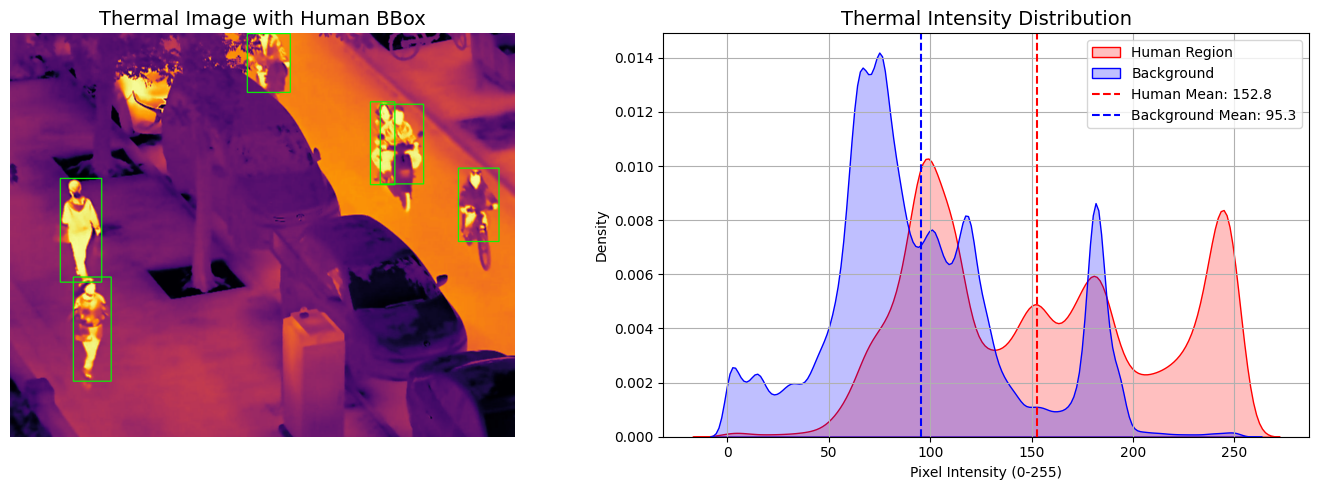

In [93]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

img_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/images"
label_dir = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels"

def analyze_human_heat_distribution(img_file):
    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found:", img_file)
        return

    h, w = img.shape
    bbox_mask = np.zeros((h, w), dtype=np.uint8)

    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f:
                _, x, y, bw, bh = map(float, line.strip().split())
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                bbox_mask[y1:y2, x1:x2] = 1

    human_pixels = img[bbox_mask == 1]
    background_pixels = img[bbox_mask == 0]

    heatmap_img = cv2.applyColorMap(img, cv2.COLORMAP_INFERNO)
    for line in open(label_path):
        _, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)
        cv2.rectangle(heatmap_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].imshow(cv2.cvtColor(heatmap_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Thermal Image with Human BBox", fontsize=14)
    axs[0].axis("off")

    sns.kdeplot(human_pixels, label="Human Region", color="red", fill=True, ax=axs[1])
    sns.kdeplot(background_pixels, label="Background", color="blue", fill=True, ax=axs[1])

    axs[1].axvline(human_pixels.mean(), color="red", linestyle="--", label=f"Human Mean: {human_pixels.mean():.1f}")
    axs[1].axvline(background_pixels.mean(), color="blue", linestyle="--", label=f"Background Mean: {background_pixels.mean():.1f}")

    axs[1].set_title("Thermal Intensity Distribution", fontsize=14)
    axs[1].set_xlabel("Pixel Intensity (0-255)")
    axs[1].set_ylabel("Density")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

analyze_human_heat_distribution("190067.jpg")


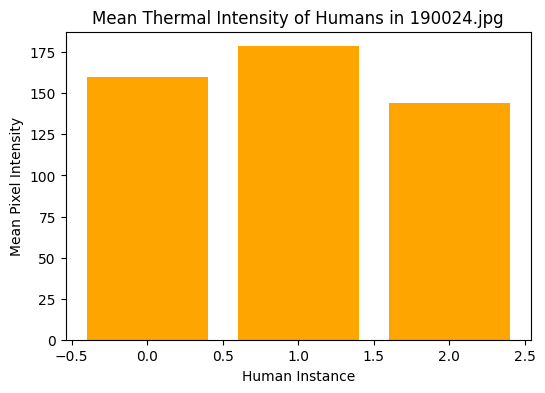

In [94]:
def analyze_human_thermal_intensity(img_file):
    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None or not os.path.exists(label_path):
        return

    h, w = img.shape
    intensities = []

    with open(label_path) as f:
        for line in f:
            _, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)

            human_region = img[y1:y2, x1:x2]
            mean_intensity = np.mean(human_region)
            intensities.append(mean_intensity)

    # Plot or return intensities
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(intensities)), intensities, color='orange')
    plt.title(f"Mean Thermal Intensity of Humans in {img_file}")
    plt.xlabel("Human Instance")
    plt.ylabel("Mean Pixel Intensity")
    plt.show()

# Example usage:
analyze_human_thermal_intensity("190024.jpg")


In [ ]:
%pip install shapely

In [102]:
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
img_files[100]

'190101.jpg'

Reading image from: /Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/train/images/010004.jpg
Reading labels from: /Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/train/labels/010004.txt


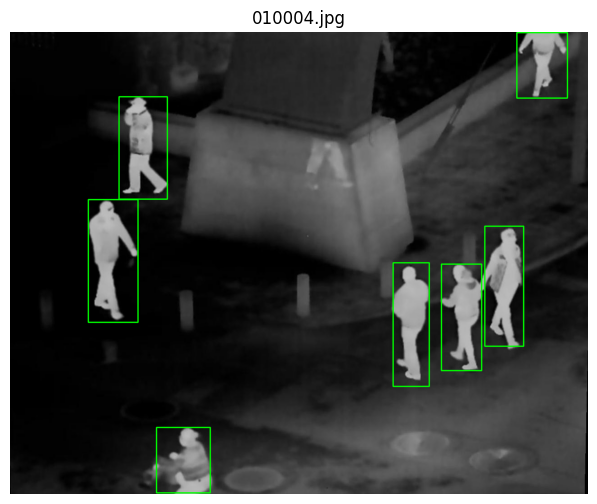

In [108]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_image_with_boxes(img_path, label_path):
    print(f"Reading image from: {img_path}")
    print(f"Reading labels from: {label_path}")
    
    if not os.path.exists(img_path):
        print("❌ Image path does not exist.")
        return
    if not os.path.exists(label_path):
        print("❌ Label path does not exist.")
        return

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Image could not be read.")
        return

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    h, w = img.shape[:2]
    boxes = read_yolo_labels(label_path, w, h)

    if not boxes:
        print("⚠️ No boxes found.")

    for cls, x1, y1, x2, y2 in boxes:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

img_path = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/train/images/010004.jpg"
label_path = "/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/train/labels/010004.txt"

plot_image_with_boxes(img_path, label_path)


In [110]:
from shapely.geometry import box as shapely_box

def compute_iou(box1, box2):
    b1 = shapely_box(*box1)
    b2 = shapely_box(*box2)
    inter = b1.intersection(b2).area
    union = b1.union(b2).area
    return inter / union if union != 0 else 0

def occlusion_stats(image_dir, label_dir, iou_threshold=0.1):
    occluded_count = 0
    total_images = 0

    for filename in os.listdir(label_dir):
        label_path = os.path.join(label_dir, filename)
        image_path = os.path.join(image_dir, filename.replace('.txt', '.jpg'))  # or .png

        img = cv2.imread(image_path)
        if img is None: continue
        h, w = img.shape[:2]
        boxes = read_yolo_labels(label_path, w, h)
        coords = [(x1, y1, x2, y2) for _, x1, y1, x2, y2 in boxes]

        for i in range(len(coords)):
            for j in range(i+1, len(coords)):
                iou = compute_iou(coords[i], coords[j])
                if iou > iou_threshold:
                    occluded_count += 1
                    break
        total_images += 1

    print(f'Occluded humans in {occluded_count} of {total_images} images ({(occluded_count/total_images)*100:.2f}%)')

    print(f"Scanning label directory: {label_dir}")
print(f"Scanning image directory: {image_dir}")
print(f"Total files found: {len(os.listdir(label_dir))}")



Scanning image directory: dataset/train/images
Total files found: 3463


In [13]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_yolo_labels(label_path, img_width, img_height):
    boxes = []
    if not os.path.exists(label_path):
        return boxes
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            class_id, x_center, y_center, w, h = map(float, parts)
            x1 = int((x_center - w/2) * img_width)
            y1 = int((y_center - h/2) * img_height)
            x2 = int((x_center + w/2) * img_width)
            y2 = int((y_center + h/2) * img_height)
            boxes.append((class_id, x1, y1, x2, y2))
    return boxes

def background_variance(img_path, boxes):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Could not read image: {img_path}")
        return 0

    mask = np.ones(img.shape, dtype=bool)

    for _, x1, y1, x2, y2 in boxes:
        # Bound check
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(img.shape[1], x2)
        y2 = min(img.shape[0], y2)
        mask[y1:y2, x1:x2] = False

    background_pixels = img[mask]
    if background_pixels.size == 0:
        return 0

    return np.var(background_pixels)

def analyze_thermal_noise(image_dir, label_dir, sample_size=100):
    variances = []
    count = 0

    print(f"📁 Reading from:\n - Images: {image_dir}\n - Labels: {label_dir}")

    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue

        label_path = os.path.join(label_dir, filename)
        image_path = os.path.join(image_dir, filename.replace('.txt', '.jpg'))  

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable image: {image_path}")
            continue

        h, w = img.shape
        boxes = read_yolo_labels(label_path, w, h)
        var = background_variance(image_path, boxes)
        variances.append(var)

        count += 1
        if count >= sample_size:
            break

    if not variances:
        print("🚫 No variance data found.")
        return

    sns.set(style="whitegrid")
    sns.histplot(variances, kde=True, color="blue")
    plt.title('Background Thermal Noise Variation')
    plt.xlabel('Variance of Background Pixels')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    print(f"✅ Analyzed {count} samples.")




Drawing 6 boxes on 010001.jpg


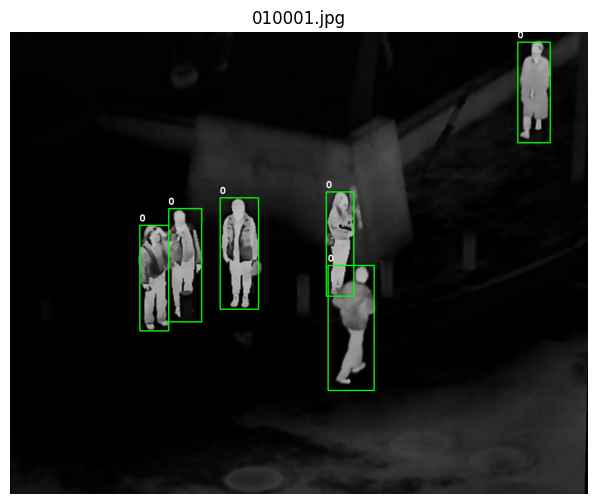

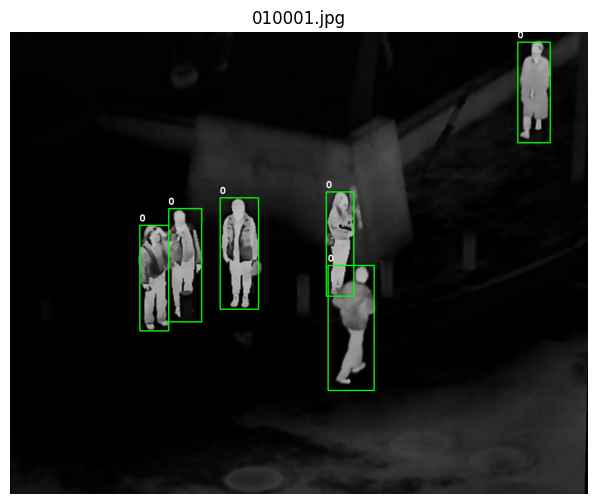

Drawing 4 boxes on 010002.jpg


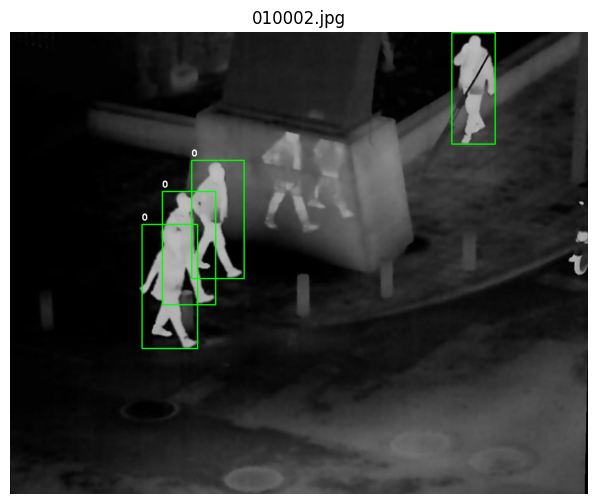

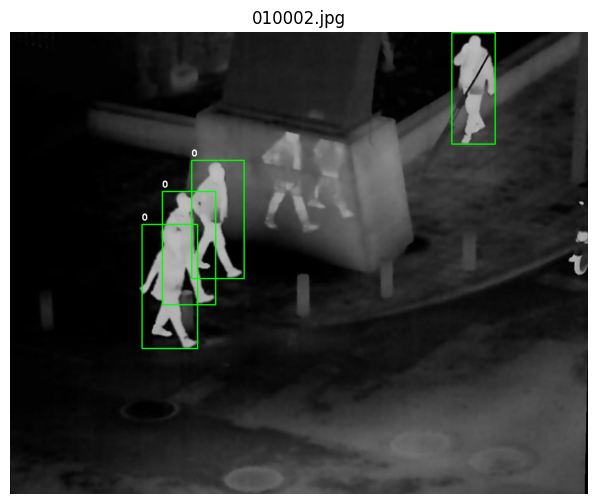

Drawing 5 boxes on 010003.jpg


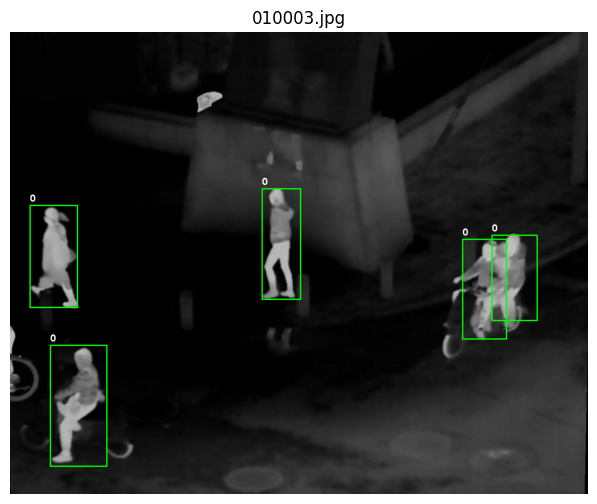

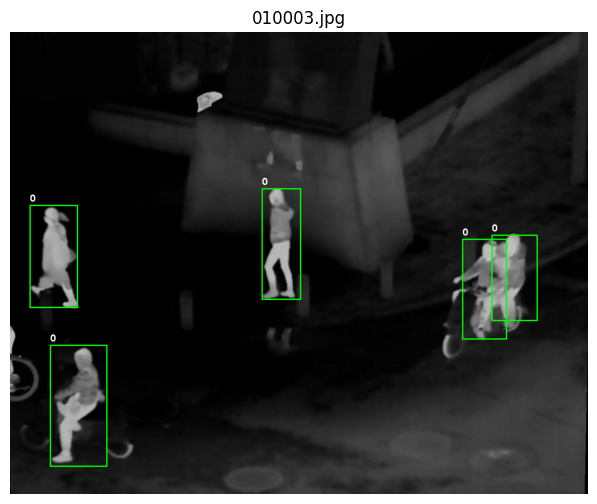

In [51]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to convert YOLO to (x1, y1, x2, y2)
def yolo_to_xyxy(box, img_w, img_h):
    x_center, y_center, w, h = box  # Only 4 values expected
    x1 = int((x_center - w / 2) * img_w)
    y1 = int((y_center - h / 2) * img_h)
    x2 = int((x_center + w / 2) * img_w)
    y2 = int((y_center + h / 2) * img_h)
    return x1, y1, x2, y2


# Function to plot image with boxes
def plot_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        lines = f.readlines()

    print(f"Drawing {len(lines)} boxes on {os.path.basename(img_path)}")

    for line_num, line in enumerate(lines):
        parts = list(map(float, line.strip().split()))
        if len(parts) != 5:
            print(f"Skipping malformed line {line_num + 1} in {label_path}: {line.strip()}")
            continue

        class_id = int(parts[0])
        box = parts[1:]
        x1, y1, x2, y2 = yolo_to_xyxy(box, w, h)

        # Draw rectangle and class
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(class_id), (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"{os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"{os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()

# Setup paths
image_dir = 'dataset/train/images'
label_dir = 'dataset/train/labels'

# List files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

# Display first 3 images
for i in range(min(3, len(image_files))):
    img_file = image_files[i]
    label_file = os.path.splitext(img_file)[0] + '.txt'

    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, label_file)

    if os.path.exists(label_path):
        plot_image_with_boxes(img_path, label_path)
    else:
        print(f"Label file not found for: {img_file}")


In [144]:
import cv2
import numpy as np
import os

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = box1Area + box2Area - interArea
    return interArea / union if union > 0 else 0

def yolo_to_xyxy(yolo_box, img_width, img_height):
    class_id, x_center, y_center, w, h = yolo_box
    x1 = (x_center - w / 2) * img_width
    y1 = (y_center - h / 2) * img_height
    x2 = (x_center + w / 2) * img_width
    y2 = (y_center + h / 2) * img_height
    return [x1, y1, x2, y2]

def occlusion_stats(image_dir, label_dir, iou_thresh=0.3):
    overlap_count = 0
    partial_count = 0
    total_boxes = 0

    for img_file in os.listdir(image_dir):
        if not img_file.endswith(('.jpg', '.png')):
            continue

        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        img_path = os.path.join(image_dir, img_file)

        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        with open(label_path, 'r') as f:
            yolo_boxes = [list(map(float, line.strip().split())) for line in f]

        boxes = [yolo_to_xyxy(b, w, h) for b in yolo_boxes]
        total_boxes += len(boxes)

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            if x1 <= 1 or y1 <= 1 or x2 >= w - 1 or y2 >= h - 1:
                partial_count += 1
            for j in range(i + 1, len(boxes)):
                iou = compute_iou(boxes[i], boxes[j])
                if iou > iou_thresh:
                    overlap_count += 1

    print(f"Total bounding boxes: {total_boxes}")
    print(f"Overlapping pairs (possible occlusion): {overlap_count}")
    print(f"Partially visible boxes (cut off at edges): {partial_count}")


occlusion_stats(image_dir, label_dir)

Total bounding boxes: 34135
Overlapping pairs (possible occlusion): 838
Partially visible boxes (cut off at edges): 4937


Showing: 200031.jpg


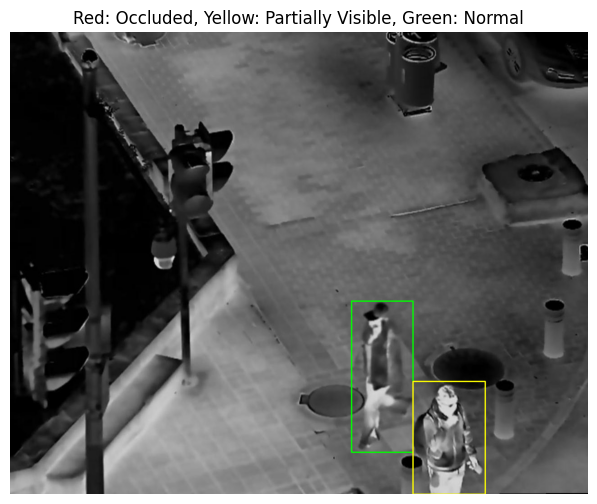

In [44]:
import os
import cv2
import random
import matplotlib.pyplot as plt




def visualize_occlusions(img_path, label_path, iou_thresh=0.3):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        yolo_boxes = [list(map(float, line.strip().split())) for line in f]

    boxes = [yolo_to_xyxy(b, w, h) for b in yolo_boxes]
    overlapped_indices = set()
    partial_indices = set()

    # Detect overlapping pairs
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        # Check partial visibility
        if x1 <= 1 or y1 <= 1 or x2 >= w - 1 or y2 >= h - 1:
            partial_indices.add(i)
        for j in range(i + 1, len(boxes)):
            iou = compute_iou(boxes[i], boxes[j])
            if iou > iou_thresh:
                overlapped_indices.update([i, j])

    # Draw bounding boxes
    for idx, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        if idx in overlapped_indices:
            color = (0, 0, 255)  # Red for occlusion
        elif idx in partial_indices:
            color = (0, 255, 255)  # Yellow for partial visibility
        else:
            color = (0, 255, 0)  # Green for normal
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title("Red: Occluded, Yellow: Partially Visible, Green: Normal")
    plt.axis('off')
    plt.show()

    import random
import os

def visualize_random_occlusion(image_dir, label_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    while image_files:
        img_file = random.choice(image_files)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            print(f"Showing: {img_file}")
            visualize_occlusions(img_path, label_path)
            break
        else:
            image_files.remove(img_file)

image_dir = 'dataset/test/images'
label_dir = 'dataset/test/labels'
def yolo_to_xyxy(box, img_width, img_height):
    _, x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_, y1_, x2_, y2_ = box2

    inter_x1 = max(x1, x1_)
    inter_y1 = max(y1, y1_)
    inter_x2 = min(x2, x2_)
    inter_y2 = min(y2, y2_)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x2_ - x1_) * (y2_ - y1_)
    union_area = area1 + area2 - inter_area

    return inter_area / union_area if union_area > 0 else 0




visualize_random_occlusion(image_dir, label_dir)





Mean: 101.14, Min: 0, Max: 255
Median: 89.0, Q1: 67.0, Q3: 126.0


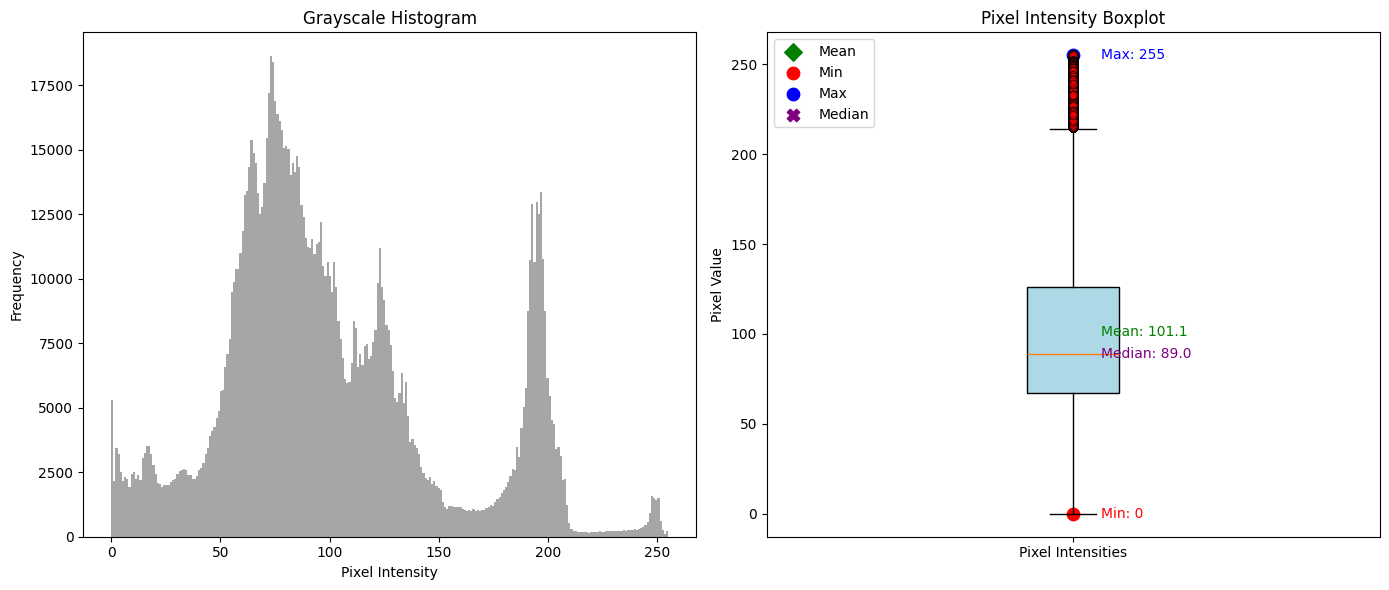

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Load grayscale image
img = cv2.imread('dataset/test/images/190001.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found!")

pixel_values = img.flatten()

# Compute stats
mean_val = np.mean(pixel_values)
min_val = np.min(pixel_values)
max_val = np.max(pixel_values)
median_val = np.median(pixel_values)
q1 = np.percentile(pixel_values, 25)
q3 = np.percentile(pixel_values, 75)

print(f"Mean: {mean_val:.2f}, Min: {min_val}, Max: {max_val}")
print(f"Median: {median_val}, Q1: {q1}, Q3: {q3}")

# Plot
plt.figure(figsize=(14, 6))

# Histogram subplot
plt.subplot(1, 2, 1)
plt.title("Grayscale Histogram")
plt.hist(pixel_values, bins=256, color='gray', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Boxplot subplot
plt.subplot(1, 2, 2)
plt.title("Pixel Intensity Boxplot")
box = plt.boxplot(pixel_values,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none', alpha=0.6))

# Add scatter points for mean, min, max, median
plt.scatter(1, mean_val, color='green', label='Mean', s=80, marker='D')
plt.scatter(1, min_val, color='red', label='Min', s=80, marker='o')
plt.scatter(1, max_val, color='blue', label='Max', s=80, marker='o')
plt.scatter(1, median_val, color='purple', label='Median', s=80, marker='X')

# Annotate points
offset = 20
plt.annotate(f"Mean: {mean_val:.1f}", (1, mean_val), xytext=(offset, 0),
             textcoords='offset points', color='green', fontsize=10, va='center')
plt.annotate(f"Min: {min_val}", (1, min_val), xytext=(offset, 0),
             textcoords='offset points', color='red', fontsize=10, va='center')
plt.annotate(f"Max: {max_val}", (1, max_val), xytext=(offset, 0),
             textcoords='offset points', color='blue', fontsize=10, va='center')
plt.annotate(f"Median: {median_val}", (1, median_val), xytext=(offset, 0),
             textcoords='offset points', color='purple', fontsize=10, va='center')

plt.xticks([1], ['Pixel Intensities'])
plt.ylabel('Pixel Value')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


In [123]:
import cv2

img_path = 'dataset/test/images/190001.jpg'  # Adjust path accordingly
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not found or path is incorrect!")
def create_mask_from_yolo(img_shape, label_path):
    height, width = img_shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)
    
    with open(label_path, 'r') as file:
        for line in file:
            cls, x_center, y_center, w, h = map(float, line.strip().split())
            
            x_center, y_center = x_center * width, y_center * height
            w, h = w * width, h * height
            
            x1 = max(0, int(x_center - w/2))
            y1 = max(0, int(y_center - h/2))
            x2 = min(width-1, int(x_center + w/2))
            y2 = min(height-1, int(y_center + h/2))
            
            if x2 > x1 and y2 > y1:
                cv2.rectangle(mask, (x1, y1), (x2, y2), 255, thickness=-1)
    
    return mask

mask = create_mask_from_yolo(img.shape, 'dataset/test/labels/190001.txt')  

human_pixels = img[mask == 255]
non_human_pixels = img[mask == 0]
import numpy as np

print("Human region stats:")
print("Mean intensity:", np.mean(human_pixels))
print("Min intensity:", np.min(human_pixels))
print("Max intensity:", np.max(human_pixels))

print("\nNon-human region stats:")
print("Mean intensity:", np.mean(non_human_pixels))
print("Min intensity:", np.min(non_human_pixels))
print("Max intensity:", np.max(non_human_pixels))

Human region stats:
Mean intensity: 156.9345149562056
Min intensity: 0
Max intensity: 255

Non-human region stats:
Mean intensity: 99.00465415840141
Min intensity: 0
Max intensity: 255


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/data.yaml',
    epochs=25,
    imgsz=640,
    batch=8,
    workers=0,        # Avoid multiprocessing issues on macOS

    # Safe augmentations for grayscale/thermal data
    degrees=0.0,      # No rotation (or set to 10.0 if needed)
    translate=0.1,    # Slight horizontal/vertical shift
    scale=0.5,        # Random zoom in/out
    fliplr=0.5,       # Horizontal flip — useful and valid
    mosaic=1.0,       # Great for adding diversity
    mixup=0.1,        # Light mixup to simulate parti sal occlusion
    copy_paste=0.1    # Simulates overlapping humans
)


New https://pypi.org/project/ultralytics/8.3.151 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.149 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train34, nbs=64, nms=Fals

train: Scanning /Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/train/labels.cache... 2282 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2282/2282 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1622.2±447.1 MB/s, size: 70.1 KB)



val: Scanning /Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]

Plotting labels to runs/detect/train34/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train34
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.628      1.523      1.313          6        640: 100%|██████████| 286/286 [09:55<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [05:27<00:00,  2.62s/it]


                   all       2000       5219      0.924      0.794      0.888      0.548

1 epochs completed in 0.257 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 6.2MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M4)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [05:10<00:00,  2.48s/it]


                   all       2000       5219      0.924      0.794      0.888      0.548
Speed: 0.7ms preprocess, 147.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train34


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x37d299d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [79]:
from ultralytics import YOLO

model_path = '/Users/cavins/Desktop/project/Thermal-image-human-detection/runs/detect/train27/weights/best.pt'

model = YOLO(model_path)

results = model.val()

def print_detection_metrics(det_metrics):
    results_dict = det_metrics.results_dict

    print("\n📊 Detection Evaluation Metrics:")
    print("=" * 40)
    print(f"{'Metric':<25} | {'Value':>10}")
    print("-" * 40)
    print(f"{'Precision':<25} | {results_dict.get('metrics/precision(B)', 0):.4f}")
    print(f"{'Recall':<25} | {results_dict.get('metrics/recall(B)', 0):.4f}")
    print(f"{'mAP@0.5':<25} | {results_dict.get('metrics/mAP50(B)', 0):.4f}")
    print(f"{'mAP@0.5:0.95':<25} | {results_dict.get('metrics/mAP50-95(B)', 0):.4f}")
    print(f"{'Fitness':<25} | {results_dict.get('fitness', 0):.4f}")
    print("=" * 40)

print_detection_metrics(results)


Ultralytics 8.3.149 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M4)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 188.9±65.1 MB/s, size: 65.6 KB)


val: Scanning /Users/cavins/Desktop/project/Thermal-image-human-detection/dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [05:04<00:00,  2.44s/it]


                   all       2000       5219      0.919       0.86      0.937      0.601
Speed: 0.7ms preprocess, 145.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val13

📊 Detection Evaluation Metrics:
Metric                    |      Value
----------------------------------------
Precision                 | 0.9191
Recall                    | 0.8596
mAP@0.5                   | 0.9374
mAP@0.5:0.95              | 0.6007
Fitness                   | 0.6344
